# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

In [ ]:
import pandas as pd
df_survey = pd.read_csv("/content/Data 301 Class Survey Responses - Form Responses 1.csv")
df_survey.head()

,What is your major?,Where are you living this quarter?,How many siblings do you have?,What is your favorite color?,"What is a cool TV show, movie, or book that you liked in 2020?",Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?,Do you consider yourself a sports fan?,Do you enjoy video games?,Do you consider yourself artistic?
0,Other,"Off Campus, but in SLO",2,Light Blue,Criminal Minds,500000.0,No,Yes,Yes
1,Statistics,"Off Campus, outside of SLO",5,green,A Gentleman in Moscow,930000.0,No,No,No
2,Computer Science,"Off Campus, but in SLO",2,blue,Crescent City by Sarah J Maas,10000000.0,Yes,No,Yes
3,Other,"Off Campus, outside of SLO",2,Green,The Institute by Stephen King,400000.0,No,No,Yes
4,Computer Science,"Off Campus, outside of SLO",1,Blue/Indigo,Peaky Blinders,100000.0,Yes,Yes,No


## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

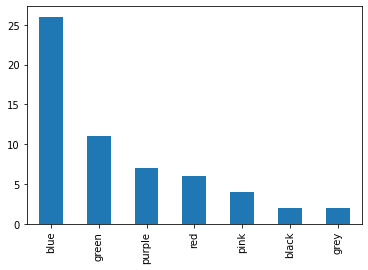

In [ ]:
def color_status(c):
  if c.__contains__("blue"):
    return "blue"
  elif c.__contains__("green"):
    return "green"
  elif c.__contains__("pink"):
    return "pink"
  elif c.__contains__("gray"):
    return "grey"
  elif c.__contains__("navy"):
    return "blue"
  elif c.__contains__("turquoise"):
    return "blue"
  elif c.__contains__("teal"):
    return "blue"
  elif c.__contains__("magenta"):
    return "purple"
  else: 
    return c

df_survey["color"] = df_survey["What is your favorite color?"].str.lower().map(color_status)
df_survey["color"].value_counts().plot(kind = "bar", xlabel = "Color", ylabel = "Count")

**Blue is overwhelmingly the most popular primary color, followed by green and then purple.**



## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

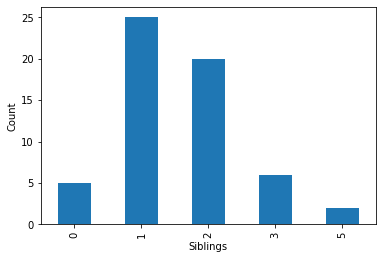

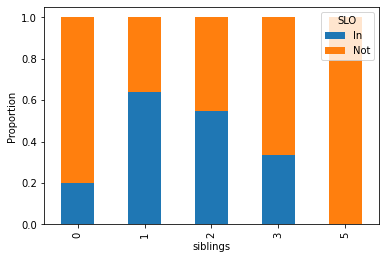

In [ ]:
def SLO_status(s):
  if s.__contains__("in SLO"):
    return "In"
  else:
    return "Not"

df_survey["siblings"] = df_survey["How many siblings do you have?"].astype(str)
df_survey["SLO"] = df_survey["Where are you living this quarter?"].astype(str).map(SLO_status)
df_survey["siblings"].value_counts().loc[["0", "1", "2", "3", "5"]].plot(kind = "bar", xlabel = "Siblings", ylabel = "Count")
joint_SLO_siblings = pd.crosstab(df_survey["siblings"], df_survey["SLO"])
cond_SLO_siblings = joint_SLO_siblings.divide(joint_SLO_siblings.sum(axis = 1), axis=0)
cond_SLO_siblings.plot(kind = "bar", ylabel = "Proportion", stacked = True)

**The overall proportion of students living within or outside of SLO slightly favors living in SLO. Breaking down student living conditions by sibling count reveals that students with 1 or 2 siblings are more likely to live in SLO while students with 0, 3 or 5 are overwhelmingly likely to live outside SLO.**

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


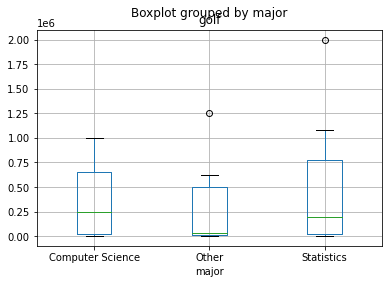

In [ ]:
df_survey["golf"] = df_survey["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"].astype(int)
df_survey["major"] = df_survey["What is your major?"]
df_survey.loc[df_survey["golf"] < 2500000].boxplot(column = "golf", by = "major")

**Computer Science majors seem to have the highest guesses for golf ball counts. Statistics majors have the smallest, both in terms of mean count and peak count. Once I dropped the extremely high outliers the bar plots showed CS majors have the highest mean, Other majors having the smallest, and Statistics majors are in the middle. Statistics majors now have the greadest range.**


## Question 4

Write and answer your own question using this data set.

In [ ]:
df_survey["sports"] = df_survey["Do you consider yourself a sports fan?"]
df_survey["games"] = df_survey["Do you enjoy video games?"]
df_survey["artistic"] = df_survey["Do you consider yourself artistic?"]
joint_sports_games = pd.crosstab(df_survey["sports"], df_survey["games"])
joint_sports_games
cond_sports_games = joint_sports_games.divide(joint_sports_games.sum(axis = 0), axis = 1)
cond_sports_games

KeyError: ignored

**I wondered whether there is an association between video gamers and sports fans. Does enjoying one effect the chances of liking the other? What I found seems to indicate no significant difference in proportions of liking video games based on enjoying sports.**


In [ ]:
joint_sports_artistic = pd.crosstab(df_survey["sports"], df_survey["artistic"])
joint_sports_artistic
cond_sports_artistic = joint_sports_artistic.divide(joint_sports_artistic.sum(axis = 0), axis = 1)
cond_sports_artistic

artistic,No,Yes
sports,,
No,0.485714,0.608696
Yes,0.514286,0.391304


**This comparison examines sports fans and being artistic. I found that sports fans have a relatively small proportion of identifying as artistic at 0.39. Non-sports fans have a larger proportion of identifying as artistic at 0.51.**

In [ ]:
joint_games_artistic = pd.crosstab(df_survey["games"], df_survey["artistic"])
joint_games_artistic
cond_games_artistic = joint_games_artistic.divide(joint_games_artistic.sum(axis = 0), axis = 1)
cond_games_artistic

artistic,No,Yes
games,,
No,0.2,0.26087
Yes,0.8,0.73913


**Both gamers and non-gamers predominantly identify as not artistic. However, there is a higher proportion of artists in the non-gamer group compared to the gamer group, 0.8 compared to 0.73.**